# 4. Dimensionality Reduction, Feature Extraction, Manifold Learning (차원 축소, 특성 추출, 매니폴드 학습)
- 비지도 학습을 사용해 데이터를 변환하는 이유 중 가장 일반적인 동기는 시각화하거나, 데이터를 압축하거나, 추가적인 처리를 위해 정보가 더 잘 드러나는 표현을 찾기 위해서
- 이런 용도로 가장 간단하고 흔히 사용하는 알고리즘
- 1) 주성분 분석(PCA, Principal Component Analysis)
- 2) 비음수 행렬 분해(NMF, Non-negative Matrix Factorization)는 주로 특성 추출에 널리 사용
- 3) t-SNE(t-distributed Stochastic Neighbor Embedding)알고리즘은 2차원 산점도를 이용해 시각화 용도로 많이 사용

## 4-1. 주성분 분석 (PCA)
- 주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술
- 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택됨

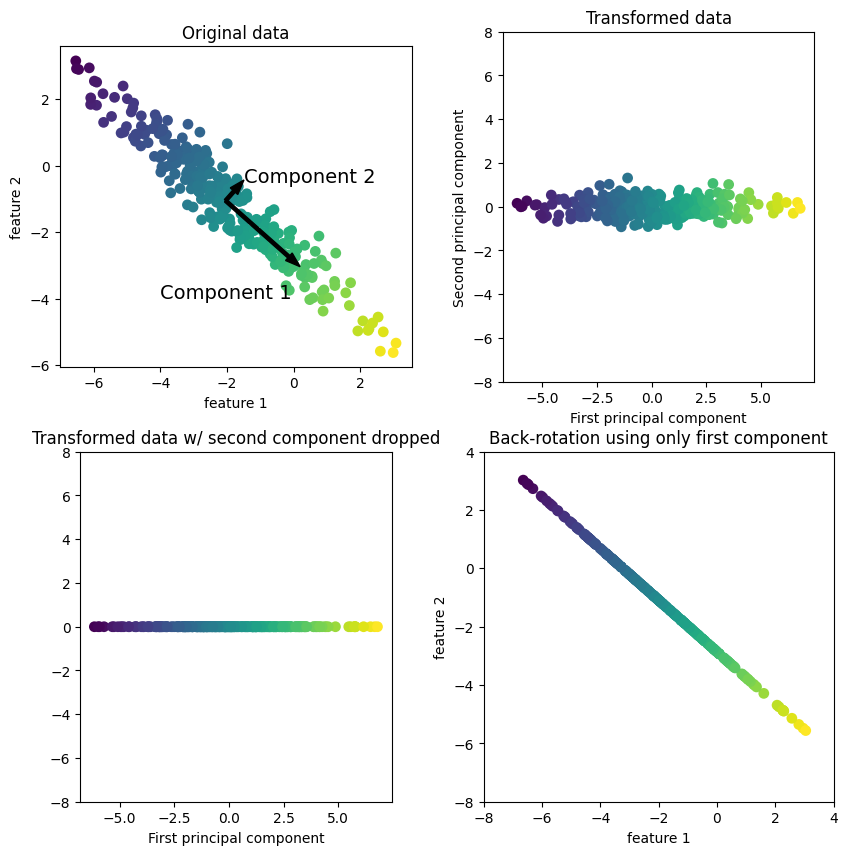

In [59]:
# 인위적으로 만든 2차원 데이터셋을 사용하여 PCA 효과를 나타냄
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

mglearn.plots.plot_pca_illustration()

- 왼쪽 위 그래프는 원본 데이터 포인트를 색으로 구분해 표시
- 이 알고리즘은 먼저 "Component 1"이라고 쓰여 있는, 분산이 가장 큰 방향을 찾음
- 이 방향(또는 벡터)이 데이터에서 가장 많은 정보를 담고 있는 방향
- 다른 말로, 특성들의 상관관계가 가장 큰 방향
- 그 다음으로, 이 알고리즘은 첫 번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾음
- 2차원에서는 가능한 직각 방향이 하나뿐이지만 고차원에서는 (무한히) 많은 직각 방향이 있을 수 있음
- 두 성분을 화살표로 나타냈지만, 사실 화살표의 머리와 꼬리는 아무 의미가 없음
- 즉 화살표를 중앙에서 오른쪽 아래로 향하게 그리지 않고 외쪽 위로 향하게 그릴 수도 있음
- 주성분 (Principal Component) : 이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향. 일반적으로 원본 특성 갯수만큼의 주성분이 있음

- 오른쪽 위 그래프는 같은 데이터지만 주성분 1과 2를 각각 x축과 y축에 나란하도록 회전한 것
- 회전하기 전에 데이터에서 평균을 빼서 중심을 원점에 맞췄음
- PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행렬(Correlation Matrix)이 대각선 방향을 제외하고는 0이 됨

- PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있음
- 왼쪽 아래 그래프는 첫 번째 주성분만 유지. 이렇게 하면 2차원 데이터셋이 1차원 데이터셋으로 차원이 감소
- 단순히 원본 특성 중 하나만 남기는 것이 아닌, 가장 유용한 방향을 찾아서 그 방향의 성분, 즉 첫 번째 주성분을 유지하는 것 (첫 번째 그래프에서 오른쪽 아래로 향하는 성분이 여기 해당)

- 오른쪽 아래 그래프는 데이터에 다시 평균을 더하고 반대로 회전시킨 것
- 이 데이터 포인트들은 원래 특성 공간에 놓여 있지만 첫 번째 주성분의 정보만 담고 있음
- 이 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화하는 데 종종 사용

### PCA를 적용해 유방암 데이터셋 시각화
- PCA가 가장 널리 사용되는 분야는 고차원 데이터셋의 시각화
- 세 개 이상의 특성을 가진 데이터를 산점도로 표현하기란 쉽지 않음
- iris 데이터셋의 경우 두 개씩 짝지은 특성들의 관계를 산점도 행렬로 그릴 수 있었음
- 하지만 cancer 데이터셋에는 산점도 행렬도 적용이 어려움
- 이 데이터셋은 특성이 30개나 되기 때문에(산점도 행렬의 우삼각형 부분만 하더라도) 30 * 14.5 = 435개의 산점도를 그려야 함
- 따라서 이렇게 많은 그래프는 이해나 자세히 들여다보는 것도 어려움
- 쉬운 방법은 양성과 악성 두 클래스에 대해 각 특성의 히스토그램을 그리는 것

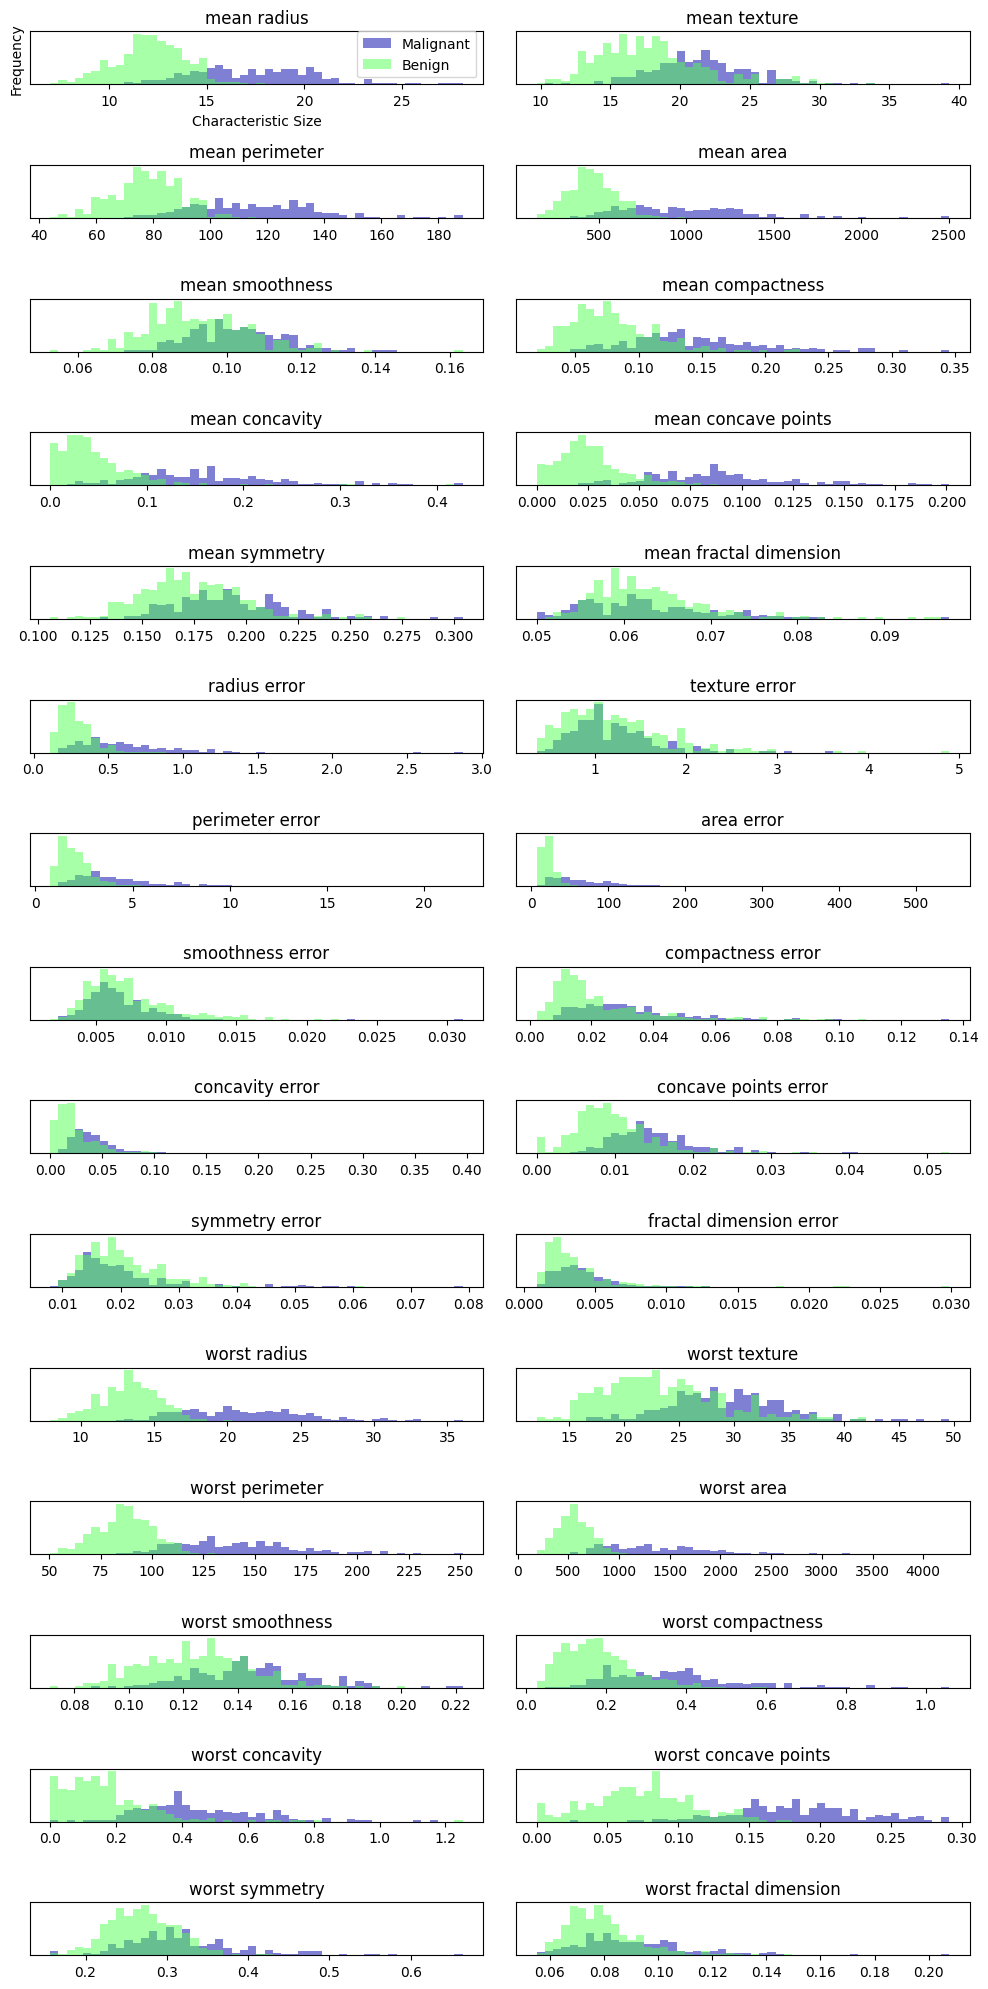

In [60]:
# cancer 데이터의 클래스별 특성 히스토그램

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
  _, bins = np.histogram(cancer.data[:, i], bins=50)
  ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
  ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
ax[0].set_xlabel("Characteristic Size")
ax[0].set_ylabel("Frequency")
ax[0].legend(["Malignant", "Benign"], loc="best")
fig.tight_layout()

- 각 특성에 대한 히스토그램으로 특정 간격(bin)에 얼마나 많은 데이터 포인트가 나타나는지 횟수를 센 것
- 각 그래프는 히스토그램 두 개를 겹쳐놓은 것으로 초록색은 양성 클래스의 포인트를, 푸른색은 악성 클래스의 포인트를 나타냄
- 이 그림은 특성들이 클래스별로 어떻게 분포되어 있는지를 알려주고, 이를 통해 어떤 특성이 양성과 악성 샘플을 구분하는 데 더 좋은지 가늠해볼 수 있음
- 예를 들어 'smoothness error' 특성은 두 히스토그램이 거의 겹쳐져 별로 쓸모가 없음
- 하지만 'worst concave points'는 두 히스토그램이 확실히 구분되어 매우 유용한 특성
- 그러나 이 그래프는 특성 간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지는 전혀 알려주지 못함
- PCA를 사용하면 주요 상호작용을 찾아낼 수 있어 더 나은 그림을 만들 수 있음

In [61]:
# 처음 두 개의 주성분을 찾아 2차원 공간에 하나의 산점도로 데이터를 시각화
# PCA를 적용하기 전에 StandardScaler를 사용해 각 특성의 분산이 1이 되도록 데이터의 스케일을 조정
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

- PCA 변환을 학습하고 적용하는 것은 데이터 전처리만큼 간단
- PCA 객체를 생성하고, fit 메서드를 호출해 주성분을 찾고, transform 메서드를 호출해 데이터를 회전시키고 차원을 축소
- 기본값일 때 PCA는 데이터를 회전(그리고 이동)만 시키고 모든 주성분을 유지
- 데이터의 차원을 줄이려면 PCA 객체를 만들 때 얼마나 많은 성분을 유지할지 알려줘야 함

In [62]:
from sklearn.decomposition import PCA
# 데어의 처음 두 개 주성분만 유지
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듦
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


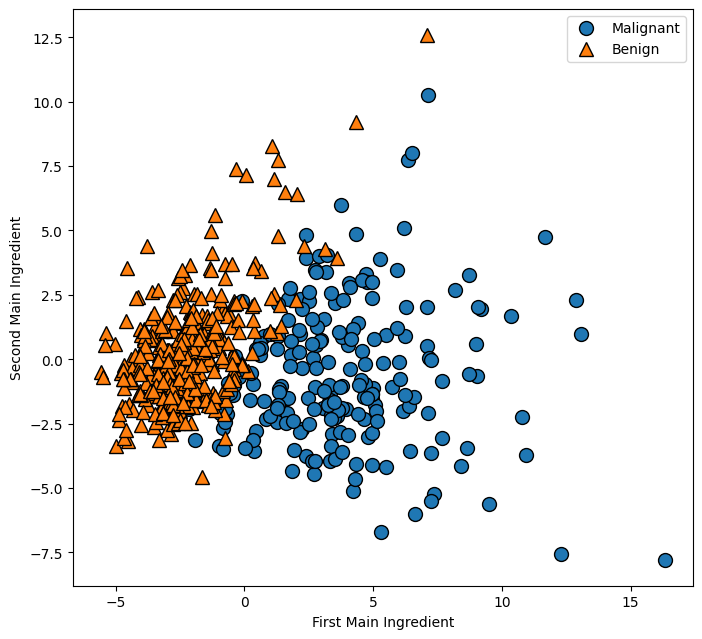

In [63]:
# 처음 두 개의 주성분을 사용해 유방암 데이터셋의 2차원 산점도를 그림
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["Malignant", "Benign"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First Main Ingredient")
plt.ylabel("Second Main Ingredient");

- PCA는 비지도 학습이므로 회전축을 찾을 때 어떤 클래스 정보도 사용하지 않고, 단순히 데이터에 있는 상관관계 만을 고려
- 이 산점도는 첫 번째 주성분과 두 번째 주성분을 사용하여 만들었고 클래스 정보를 이용하여 포인트의 모양을 구분
- 두 클래스가 2차원 공간에서 꽤 잘 구분되는 것을 볼 수 있음
- 이런 그림이라면 (2차원 공간에서 직선 하나를 학습하는) 선형 분류기로도 두 클래스를 잘 구분할 수 있을 것
- 또한 악성 포인트가 양성 포인트보다 더 넓게 퍼져있는 것을 볼 수 있음
- PCA의 단점은 그래프의 두 축을 해석하기가 쉽지 않다는 점
- 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태로, 이런 조합이 보통 매우 복잡
- PCA 객체가 학습될 때 components_ 속성에 주성분이 저장됨

In [64]:
print("PCA 주성분 형태:", pca.components_.shape)

PCA 주성분 형태: (2, 30)


- componenets_의 각 행은 주성분 하나씩을 나타내며 중요도에 따라 정렬되어 있음
- 맨 처음 주성분이 가장 위에 나타남
- 열은 원본 데이터의 특성에 대응하는 값
- 이 예에서는 "mean radius", "mean texture" 등 임

In [65]:
# componenets_값 출력
print("PCA 주성분:", pca.components_)

PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


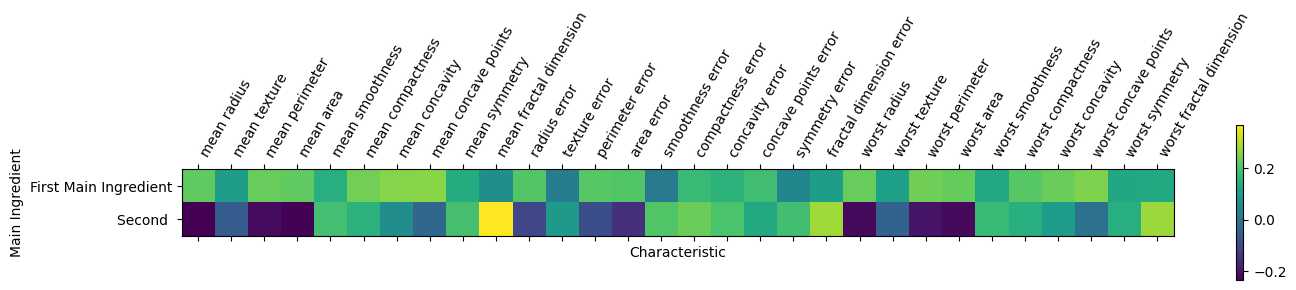

In [66]:
# 유방암 데이터셋에서 찾은 처음 두 개의 주성분 히트맵 (시각화로 이해가 더 쉬움)
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0, 1], ["First Main Ingredient", "Second "])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha="left")
plt.xlabel("Characteristic")
plt.ylabel("Main Ingredient");

- 첫 번째 주성분의 모든 특성은 부호가 같음(모두 양수지만, 앞서 언급한 대로 주성분의 화살표 방향은 의미가 없음)
- 모든 특성 사이에 공통의 상호관계가 있다는 뜻
- 따라서 한 특성의 값이 커지면 다른 값들도 같이 높아질 것
- 두 번째 주성분은 부호가 섞여 있고 두 주성분 모두 30개의 특성이 있음

### 고유얼굴 (eigenface) 특성 추출
- PCA는 특성 추출에도 이용. 특성 추출은 원본 데이터 표현보다 분석하기에 더 적합한 표현을 찾을 수 있으리란 생각에서 출발
- 이미지를 다루는 애플리케이션은 특성 추출이 도움이 될만한 좋은 사례
- 이미지는 RGB의 강도가 기록된 픽셀로 구성
- 보통 이미지 안의 물체는 수 천 개의 픽셀로 이뤄지며 함께 모여 있을 때 의미가 있음
- PCA를 이용해 LFW(Labeled Faces in the Wild) 데이터셋의 얼굴 이미지에서 특성을 추출하는 아주 간단한 애플리케이션을 만듦

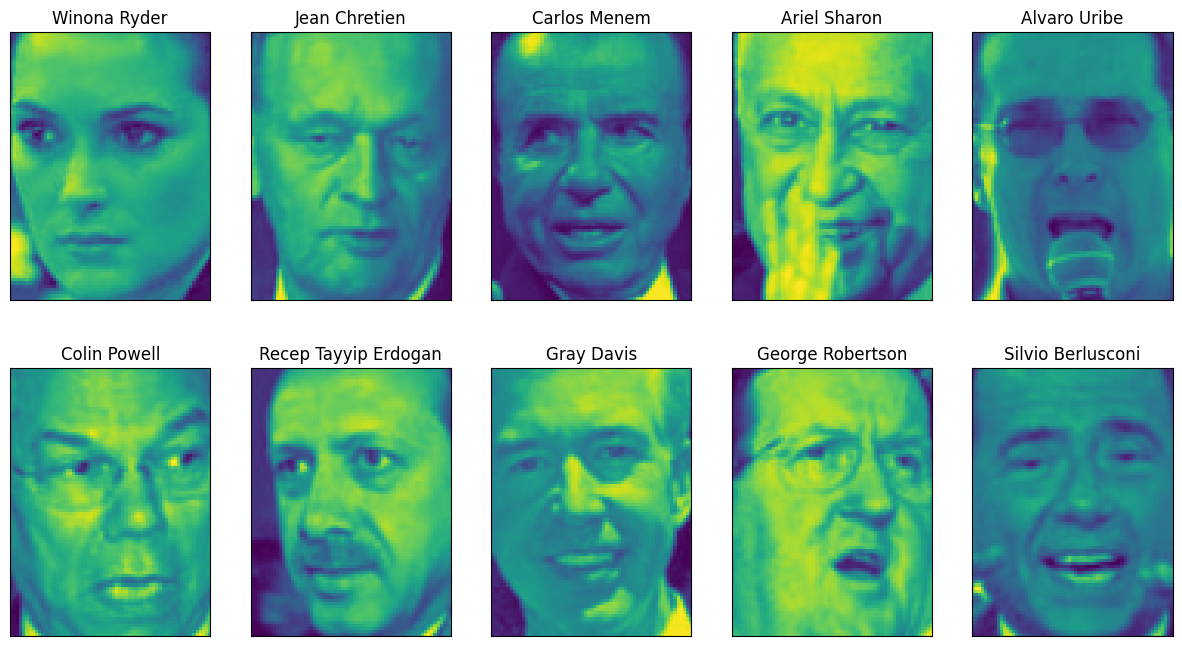

In [67]:
# LFW 데이터셋에 있는 이미지 샘플 (처리 속도를 높이고자 흑백 이미지를 사용하고 스케일을 줄임)
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={"xticks": (), "yticks": ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

In [68]:
# LFW 데이터셋에는 62명의 얼굴을 찍은 이미지가 총 3,023개가 있으며 각 이미지의 크기는 87 * 65 픽셀
print("people.images.shape:", people.images.shape)
print("클래스 갯수:", len(people.target_names))

people.images.shape: (3023, 87, 65)
클래스 갯수: 62


In [69]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
  print("{0:25} {1:3}".format(name, count), end="   ")
  if (i + 1) % 3 == 0:
    print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [70]:
# 데이터셋의 편중을 없애기 위해 사람마다 50개의 이미지만 선택
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1

  X_people = people.data[mask]
  y_people = people.target[mask]

  # 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정
  # MinMaxScaler를 적용하는 것과 매우 유사
  X_peple = X_people / 255.

- 얼굴 인식이라 하면 통상적으로 새로운 얼굴 이미지가 데이터베이스에 있는 기존 얼굴 중 하나에 속하는지 찾는 작업
- 사진 애플리케이션, 소셜 미디어, 보안 애플리케이션 등이 이에 속함
- 해결 방법 중 하나는 각 사람을 서로 다른 클래스로 구분하는 분류기를 만드는 것
- 하지만 보통 얼굴 데이터베이스에는 사람의 수는 많지만 각 사람에 대한 이미지는 적음 (클래스별 훈련 데이터가 너무 적음)
- 이런 문제 때문에 대부분의 분류기를 훈련시키기 어려움
- 그리고 대규모 모델을 다시 훈련시키지 않고도 새로운 사람의 얼굴을 쉽게 추가할 수도 있어야 함
- 간단한 방법으로, 분류하려는 얼굴과 가장 비슷한 얼굴 이미지를 찾는 1-최근접 이웃 분류기를 사용할 수 있음
- 이 분류기는 원칙적으로 클래스마다 하나의 훈련 샘플을 사용

In [71]:
# KNeighborsClassifier가 얼마나 잘 적용되는지 봄
from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듦
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.22


- 정확도는 22%. 클래스 62개를 분류하는 문제에서 아주 나쁜 결과는 아니지만 그렇다고 좋은 결과도 아님 (네 번에 한 번 꼴로만 올바르게 인식)
- 그래서 PCA가 필요. 얼굴의 유사도를 측정하기 위해 원본 픽셀 공간에서 거리를 계산하는 것은 매우 나쁜 방법
- 픽셀을 사용해서 두 이미지를 비교할 때, 각 픽셀의 회색톤 값을 다른 이미지에서 동일한 위치에 있는 픽셀 값과 비교
- 이런 방식은 사람이 얼굴 이미지를 인식하는 것과는 많이 다르고, 픽셀을 그대로 비교하는 방식으로는 얼굴의 특징을 잡아내기 어려움
- 예를 들어 픽셀을 비교할 때 얼굴 위치가 한 픽셀만 오른쪽으로 이동해도 큰 차이를 만들어 완전히 다른 얼굴로 인식하게 됨
- 그래서 주성분으로 변환하여 거리를 계산하면 정확도가 높아지지 않을까 기대
- 여기서는 PCA의 화이트닝(Whitening, 백색화) 옵션을 사용해서 주성분의 스케일이 같아지도록 조정
- 이는 화이트닝 옵션 없이 변환한 후에 StandardScaler를 적용하는 것과 같음
- 데이터를 다시 이용해서 화이트닝 옵션으로 데이터가 회전하는 것뿐만 아니라 스케일도 조정되어 그래프가 (타원이 아닌) 원 모양으로 변형됨

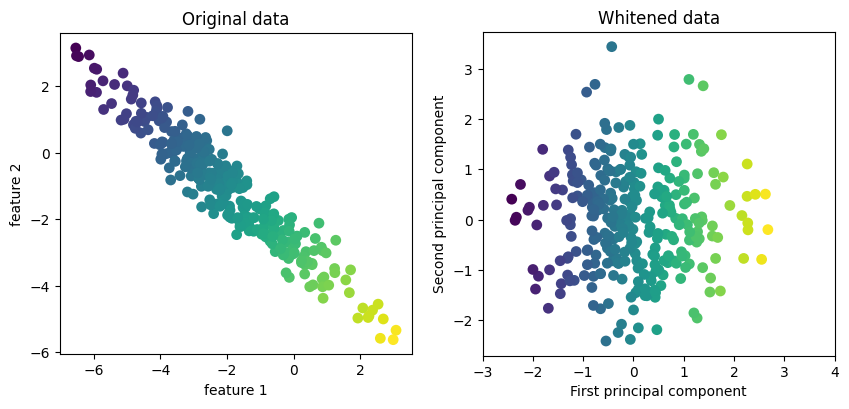

In [72]:
# 화이트닝 옵션을 사용한 PCA 데이터 변환
mglearn.plots.plot_pca_whitening()

In [73]:
# PCA 객체를 훈련 데이터로 학습시켜서 처음 100개의 주성분을 추출한 뒤, 훈련 데이터와 테스트 데이터를 변환
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape", X_train_pca.shape)

X_train_pca.shape (1547, 100)


In [74]:
# 새 데이터는 처음 100개의 주성분에 해당하는 특성을 가짐
# 이 데이터를 사용해 1-최근접 이웃 분류기로 이미지를 분류
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.30


- 모델의 정확도가 22%에서 30%로 크게 향상되었으므로 주성분이 데이터를 더 잘 표현한다고 직관적으로 판단할 수 있음
- 이미지 데이터일 경우엔 계산한 주성분을 쉽게 시각화할 수 있음
- 주성분이 나타내는 것은 입력 데이터 공간에서의 어떤 방향임
- 입력 차원은 87 * 65 픽셀의 흑백 이미지이고, 따라서 이 공간의 어떤 방향도 87 * 65 픽셀의 흑백 이미지

In [75]:
print("pca.components_.shape:", pca.components_.shape)

pca.components_.shape: (100, 5655)


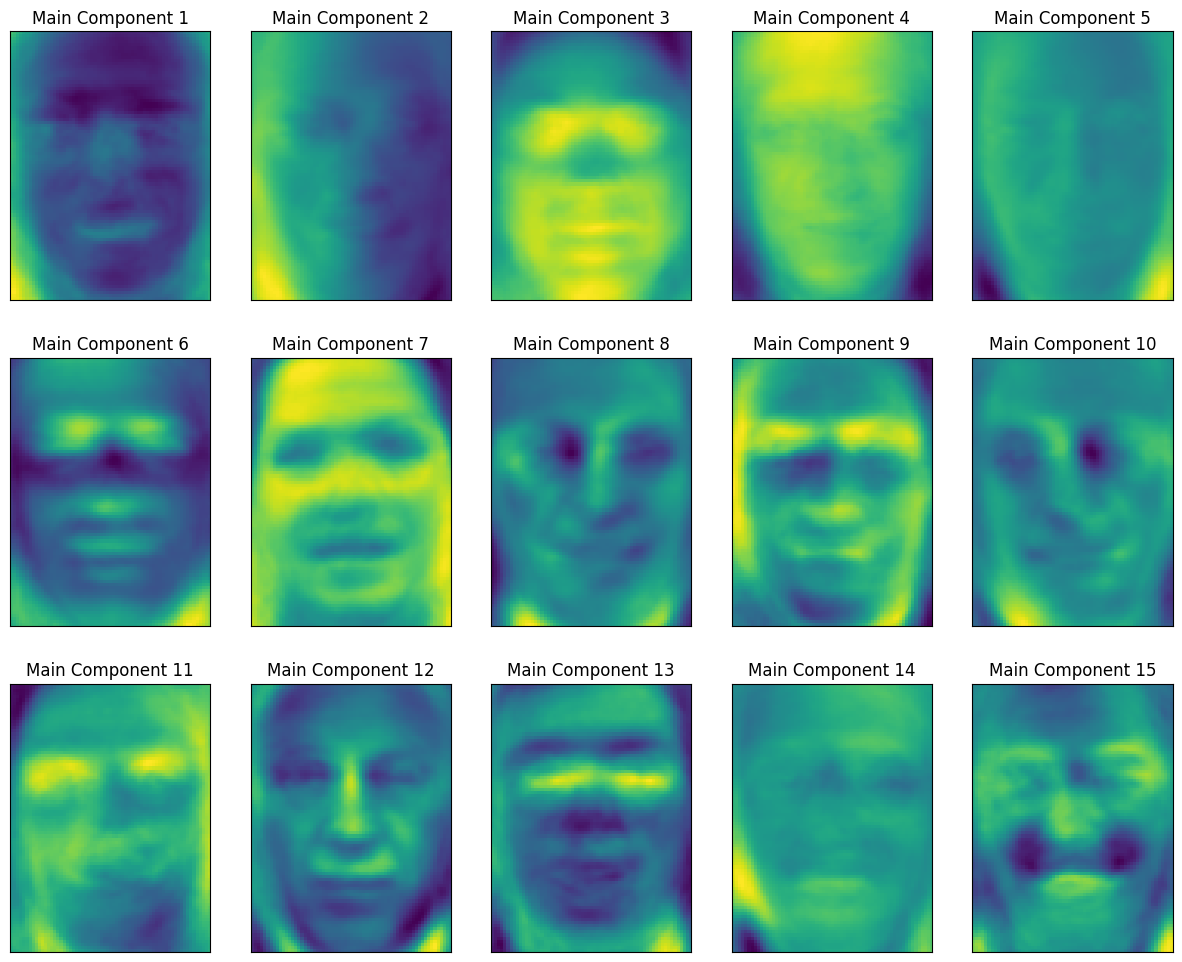

In [76]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={"xticks": (), "yticks": ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape), cmap="viridis")
  ax.set_title("Main Component {}".format((i + 1)))

- 이 주성분들을 완전하게 이해할 순 없지만 몇몇 주성분이 잡아낸 얼굴 이미지의 특징을 짐작해볼 수 있음
- 첫 번째 주성분은 얼굴과 배경의 명암 차이를 기록한 것으로 보이며, 두 번째 주성분은 오른쪽과 왼쪽 조명의 차이를 담고 있는 것 등
- 이런 방식이 원본 픽셀 값을 사용하는 것보다 더 의미 있지만, 여전히 사람이 얼굴을 인식하는 방식과는 거리가 멈
- 이 PCA모델은 픽셀은 기반으로 하므로, (눈, 볼, 코의 위치 같은) 얼굴의 배치와 조명이 두 이미지가 얼마나 비슷한지 판단하는 데 큰 영향을 줌
- 하지만 사람이라면 얼굴의 배치나 조명부터 인지하지는 않음
- 사람은 얼굴의 비슷한 정도를 평가할 때 나이, 성별, 표정, 머리 모양 같은 픽셀의 강도로 표현하기 어려운 속성들을 사용
- 알고리즘이 데이터를 해석하는 방식은 사람의 방식과는 상당히 다르다는 것을 꼭 기억해두어야 함 (특히 이미지같이 사람에게는 친숙한 시각 데이터일 경우)
- 어쨋든 PCA를 계속 사용. PCA 변환은 데이터를 회전시키고 분산이 작은 주성분을 덜어내는 것
- 또 다른 좋은 해석 방법은 테스트 포인트를 주성분의 가중치 합으로 나타내는 데 필요한 수치 (PCA 변환 뒤의 새로운 특성값)를 찾는 것으로 해석할 수 있음
- PCA 모델을 이해하는 또 다른 방법은 몇 개의 주성분을 사용해 원본 데이터를 재구성해보는 것
- 얼굴 데이터셋에 적용해서 몇 개의 주성분으로 데이터를 줄이고 원래 공간으로 되돌릴 수 있음
- 원래 특성 공간으로 되돌리는 작업은 inverse_transform 메서드를 사용

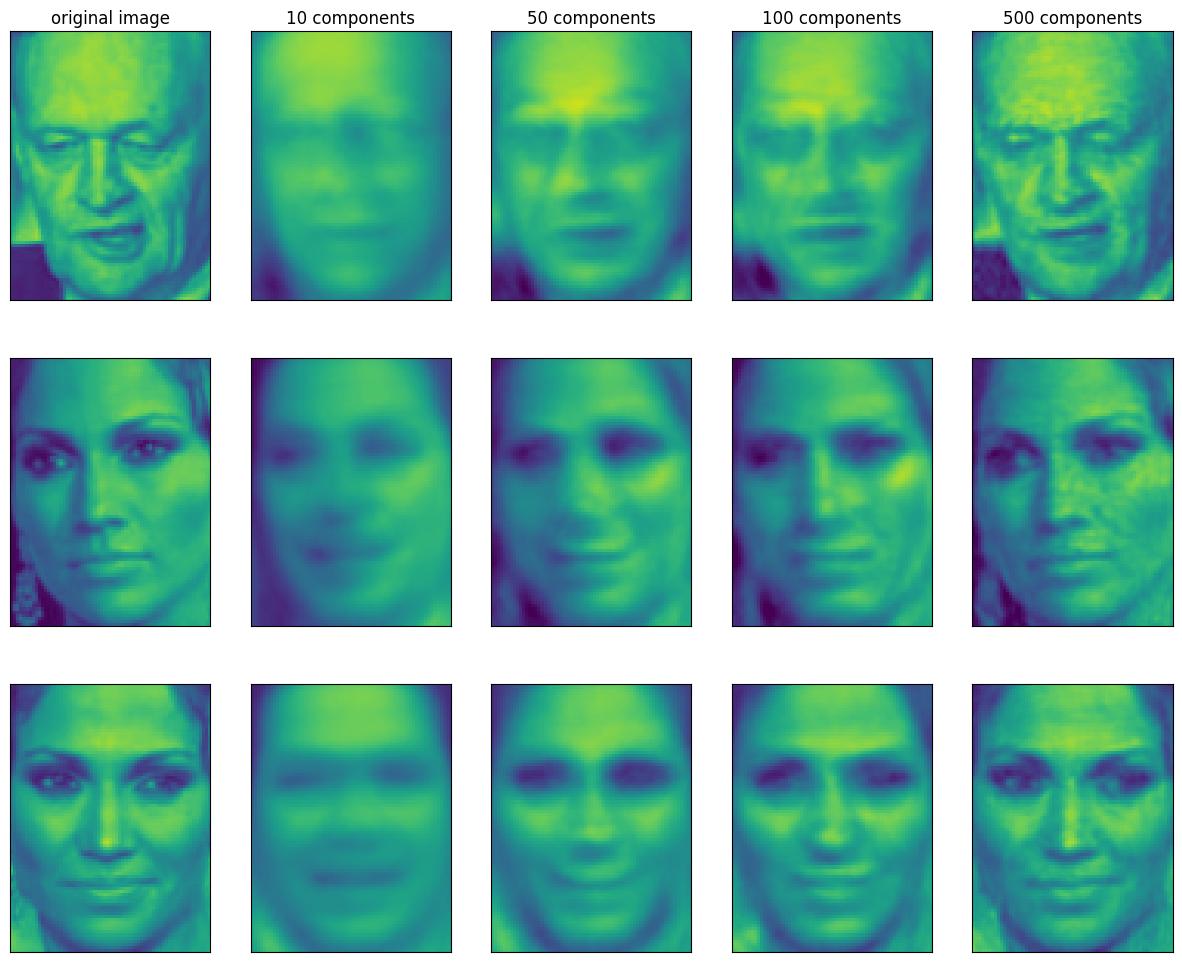

In [77]:
# 10, 50, 100, 500개의 주성분을 사용해 얼굴 이미지를 재구성
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

- 주성분을 10개만 사용했을 땐 얼굴의 각도, 조명 같은 이미지의 기본 요소만 나타남
- 주성분을 더 많이 사용할수록 이미지가 더욱 상세해짐
- 이는 덧셈 항을 더 추가하는 것과 같음
- 주성분을 픽셀 수만큼 사용하면 변환 후에 어떤 정보도 잃지 않게 되므로 이미지를 완벽하게 재구성할 수 있음
- cancer 데이터셋에서 한 것처럼 PCA의 처음 두 주성분을 이용해 전체 데이터를 누구의 얼굴인지 클래스로 구분해 산점도에 나타낼 수 있음

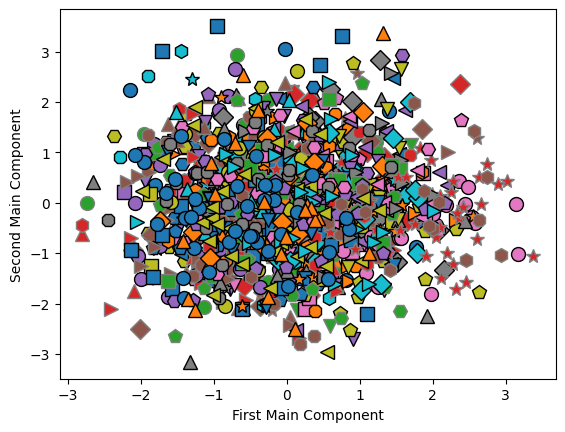

In [78]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First Main Component")
plt.ylabel("Second Main Component");

- 주성분을 두 개만 사용했을 땐 전체 데이터가 한 덩어리로 뭉쳐 있어 클래스가 잘 구분되지 않음
- 10개의 주성분을 사용했을 때도 PCA는 얼굴의 아주 대략적인 특징만 잡았기 때문에 이런 그래프가 당연해보임

- 각 주성분은 원본 데이터셋의 한 방향이므로 각 주성분이 얼만큼의 분산을 표현하는지 비교해 볼 수 있음
- 이를 설명된 분산의 비율이라고 함. scikit-learn의 PCA 클래스는 explained_variance_ratio_ 속성으로 각 주성분의 설명된 분산의 비율을 제공
- 앞에서 얼굴 데이터셋에 훈련한 PCA 객체의 설명된 분산의 비율을 모두 더해봄

In [79]:
np.sum(pca.explained_variance_ratio_)

0.8979705

- 경과에서 보듯이 100개의 주성분으로 표현할 수 있는 얼굴 데이터셋의 분산은 약 90%
- 100개의 주성분으로 얼굴을 재구성했을 때 원본 이미지의 특징이 꽤 잘 드러나는 것을 볼 수 있음
- 주성분은 가장 큰 분산의 방향을 차례대로 찾기 때문에 맨 처음 찾은 주성분이 재구성에 기여하는 정도가 가장 크고 나중으로 갈수록 작음
- 따라서 적절한 주성분의 갯수를 찾으려면 설명된 분산을 누적한 그래프를 그리면 도움이 됨

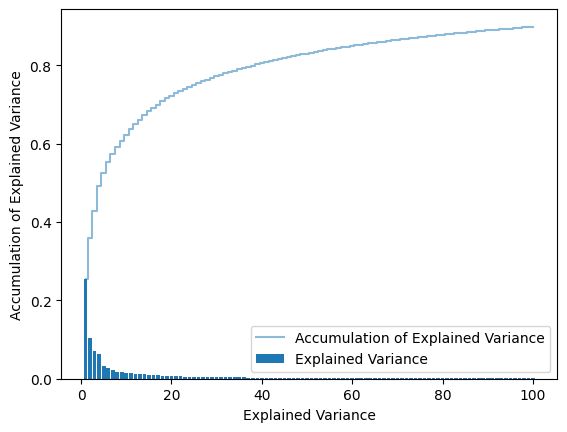

In [80]:
plt.bar(range(1, 101), pca.explained_variance_ratio_, align="center", label="Explained Variance")
plt.step(range(1, 101), np.cumsum(pca.explained_variance_ratio_), alpha=0.5, where="mid", label="Accumulation of Explained Variance")
plt.xlabel("Explained Variance")
plt.ylabel("Accumulation of Explained Variance")
plt.legend()
plt.show();

- 설명된 분산의 누적 그래프를 보면 대략 30번째 주성분 이후에는 설명된 분산이 크게 줄어든느 것을 볼 수 있음
- 주성분 40개 정도만 선택하더라도 약 80%의 분신을 표현할 수 있음
- PCA 클래스에 주성분을 40개로 지정하여 다시 훈련하고 변환된 데이터를 사용해 앞서 사용한 k-최근접 이웃 모델로 성능을 확인

In [81]:
pca = PCA(n_components=40, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.30


- 주성분 개수를 100개에서 40개로 줄였지만 테스트 세트에 대한 성능은 거의 동일
- 이는 41번째에서 100번째까지 주성분이 분류 작업에 큰 도움이 되지 않는다는 뜻
- PCA 클래스의 n_components 매개변수에는 주성분 갯수 대신 분산의 비율을 0~1 사이 실수로 지정하는 예
- 찾은 주성분 갯수는 n_components_ 속성에 저장됨

In [82]:
pca = PCA(n_components=0.8, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))
print("주성분 갯수: ", pca.n_components_)

테스트 세트 정확도: 0.29
주성분 갯수:  39


## 4-2. 비음수 행렬 분해 (NMF, Non-Negative Matrix Factorization)
- NMF는 유용한 특성을 뽑아내기 위한 또 다른 비지도 학습 알고리즘
- 이 알고리즘은 PCA와 비슷하고 차원 축소에도 사용할 수 있음
- PCA처럼 어떤 성분의 가중치 합으로 각 데이터 포인트를 나타낼 수 있음
- 하지만 PCA에서는데이터의 분산이 가장 크고 수직인 성분을 찾았다면 NMF에서는 음수가 아닌 성분과 계수 값을 찾음
- 즉 주성분과 계수가 모두 0보다 크거나 같아야 함
- 음수가 아닌 주성분과 계수의 가중치 합은 음수가 되지 않으므로 당연하게 이 방식은 음수가 아닌 특성을 가진 데이터에만 적용할 수 있음
- 음수가 아닌 가중치 합으로 데이터를 분해하는 기능은 여러 사람의 목소리가 담긴 오디오 트랙이나 여러 악기로 이뤄진 음악처럼 독립된 소스를 추가하여(덮어써서) 만들어진 데이터에 특히 유용
- 이럴 때 NMF는 섞여 있는 데이터에서 원본 성분을 구분할 수 있음
- 음수로 된 성분이나 계수가 만드는 상쇄 효과를 이해하기 어려운 PCA보다 대체로 NMF의 주성분이 해석하기 쉬움
- 예를 들어 고유얼굴(Eigenface)은 양수와 음수 값을 모두 가지고 있지만, PCA를 설명할 때 언급했듯이 이 부호는 실제로 아무 규칙이 없음
- 이 얼굴 데이터셋에 NMF를 적용하기 전에 인위적인 데이터셋으로 만든 예를 봄

### 인위적 데이터에 NMF 적용하기
- PCA를 사용할 때와는 달리 NMF로 데이터를 다루려면 주어진 데이터가 양수인지 확인해야 함
- 이 말은 데이터가 원점 (0, 0)에서 상대적으로 어디에 놓여 있는지가 NMF에서는 중요하다는 뜻
- 그렇기 때문에 원점 (0, 0)에서 데이터로 가는 방향을 추출한 것으로 음수 미포함 성분을 이해할 수 있음

c:\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


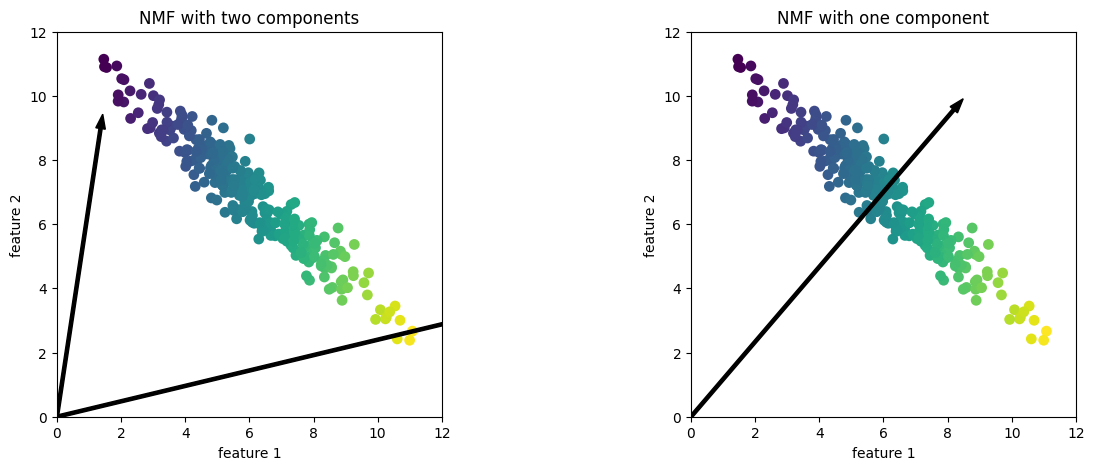

In [83]:
# 2차원 예제 데이터에 NMF를 적용한 결과를 보여줌
mglearn.plots.plot_nmf_illustration()

- 왼쪽은 성분이 둘인 NMF로, 데이터셋의 모든 포인트를 양수로 이뤄진 두 개의 성분으로 표현할 수 있음
- 데이터를 완벽하게 재구성할 수 있을 만큼 성분이 아주 많다면 (즉 특성 개수만큼 많다면), 알고리즘은 데이터의 각 특성의 끝에 위치한 포인트를 가리키는 방향을 선택할 것
- 하나의 성분만을 사용한다면 NMF는 데이터를 가장 잘 표현할 수 있는 평균으로 향하는 성분을 만듦
- PCA와는 반대로 성분 개수를 줄이면 특정 방향이 제거되는 것뿐만 아니라 전체 성부닝 완전히 바뀜
- NMF에서 성분은 특정 방식으로 정렬되어 있지도 않아서 "첫 번째 비음수 성분" 같은 것이 없으므로, 모든 성분을 동등하게 취급
- NMF는 무작위로 초기화하기 때문에 난수 생성 초깃값에 따라 결과가 달라짐
- 두 개의 성분으로 모든 데이터를 완벽하게 나타낼 수 있는 이런 간단한 예에서는 난수가 거의 영향을 주지 않음 (성분의 크기나 순서가 바뀔 수는 있음)
- 하지만 복잡한 경우에는 큰 차이를 만들수도 있음

### 얼굴 이미지에 NMF 적용하기
- LFW 데이터셋에 NMF를 적용
- NMF의 핵심 매개변수는 추출할 성분의 갯수로, 보통 이 값은 특성의 갯수보다 작음 (그렇지 않으면 픽셀 하나가 두 개의 성분으로 나뉘어 표현될 수 있음)

c:\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


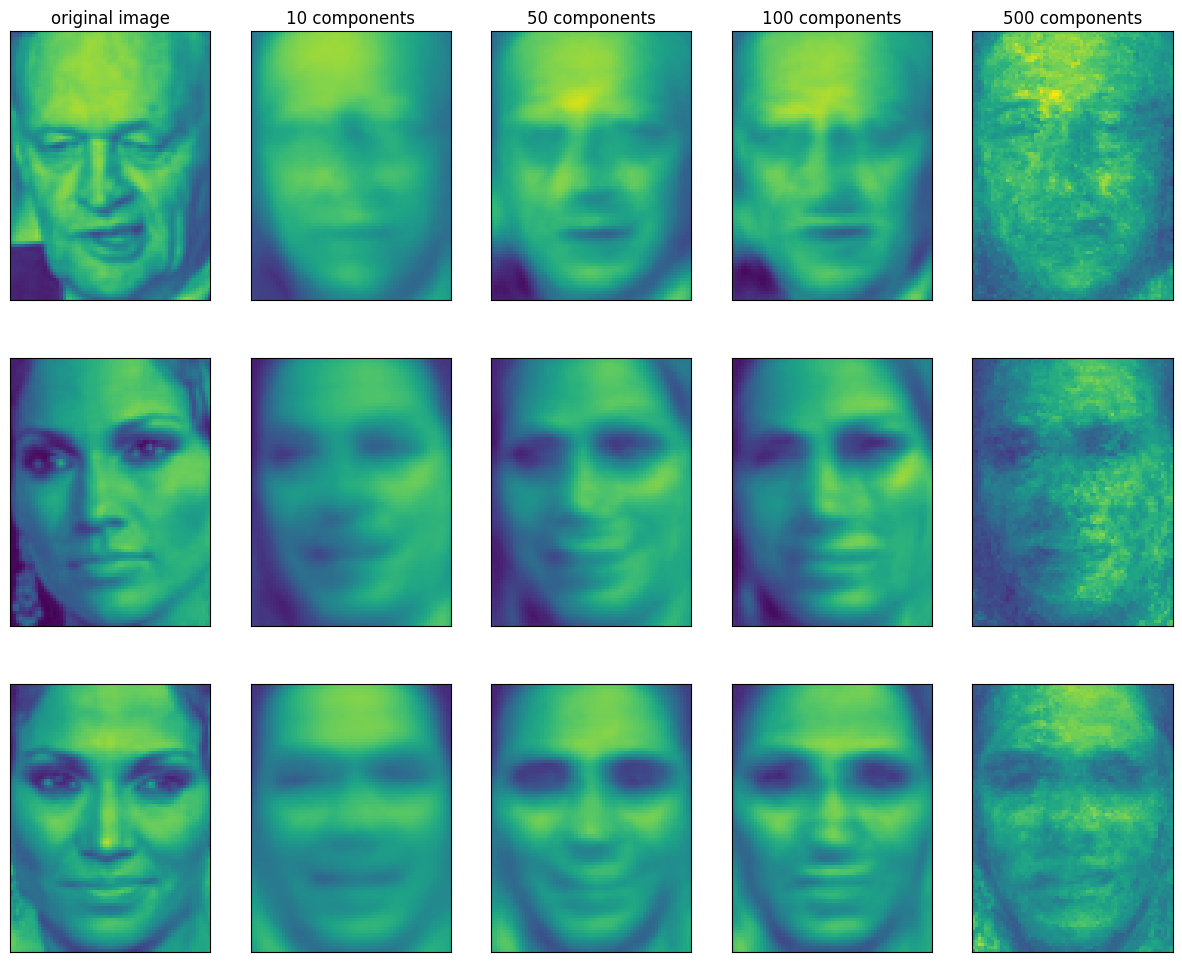

In [84]:
# NMF를 사용해 데이터를 재구성
mglearn.plots.plot_nmf_faces(X_train, X_test[:3], image_shape)

- 변환을 되돌린 결과는 PCA를 사용했을 때와 비슷하지만 품질이 조금 떨어짐
- PCA가 재구성 측면에서 최선의 방향을 찾기 때문
- NMF는 데이터를 인코딩하거나 재구성하는 용도로 사용하기보다는 주로 데이터에 있는 유용한 패턴을 찾는 데 활용

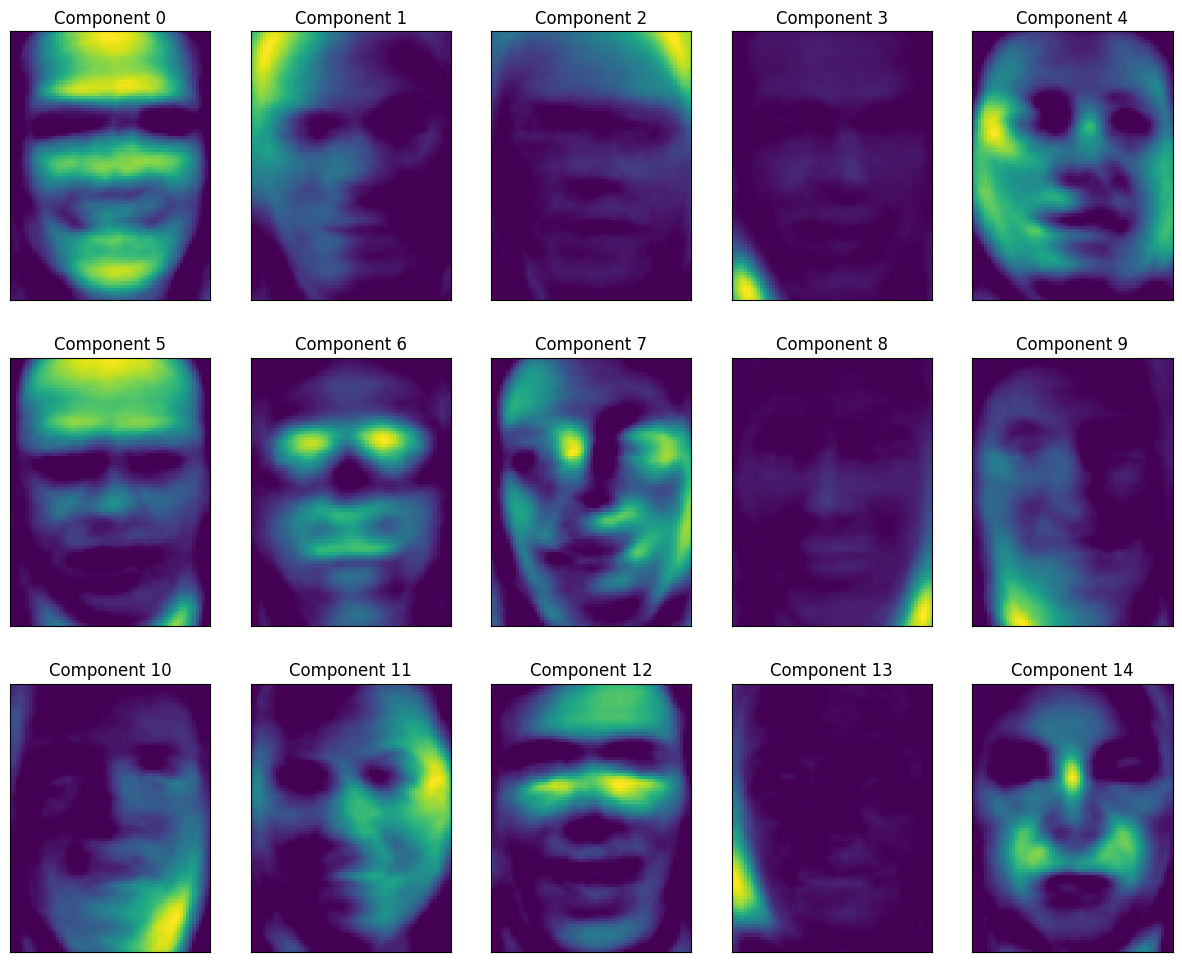

In [85]:
# 얼굴 데이터셋에서 NMF로 찾은 성분 15개
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, init="nndsvd", random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={"xticks": (), "yticks": ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape))
  ax.set_title("Component {}".format(i))

- 이 성분들은 모두 양수 값이어서 훨씬 더 얼굴 원형처럼 보임
- 예를 들어 Component3은 오른쪽으로 조금 돌아간 얼굴로 보이고, Component7은 왼쪽으로 조금 회전한 얼굴로 보임

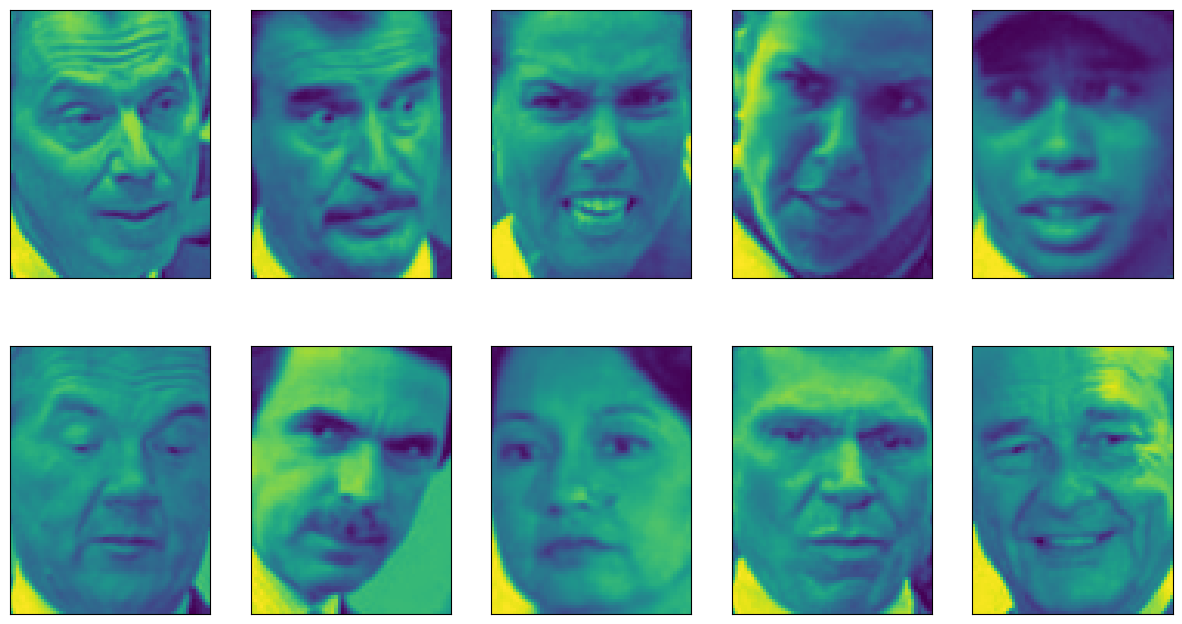

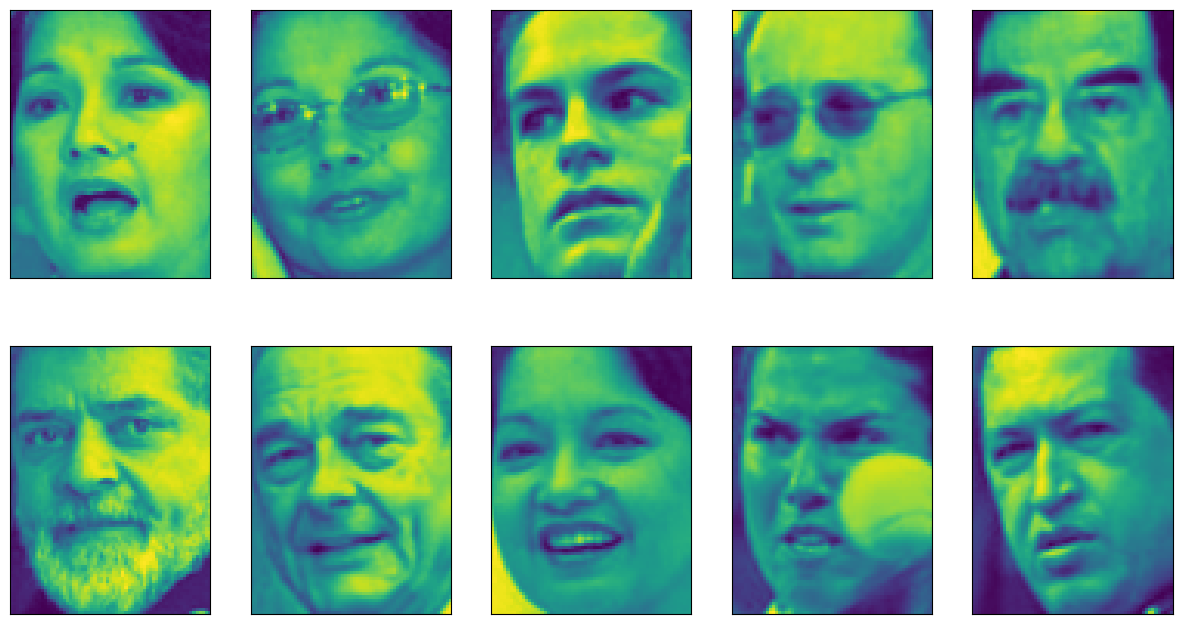

In [86]:
# 이 성분들이 특별히 강하게 나타난 이미지들
compn = 3
# 4번째 성분으로 정렬하여 처음 10개의 이미지를 출력
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={"xticks": (), "yticks": ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
  ax.imshow(X_train[ind].reshape(image_shape))

compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={"xticks": (), "yticks": ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
  ax.imshow(X_train[ind].reshape(image_shape))

- 예상대로 성분 7에 대한 계수 값이 큰 얼굴들은 왼쪽으로 돌아가 있고, 성분 3에 대한 계수 값이 큰 얼굴들은 오른쪽으로 돌아가 있음
- 이와 같은 패턴을 추출하는 것은 소리, 유전자 표현, 텍스트 데이터처럼 덧붙이는 구조를 가진 데이터에 적합

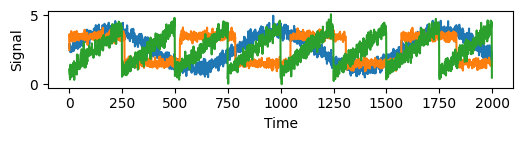

In [96]:
# 세 개의 서로 다른 입력으로부터 합성된 신호
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, "-")
plt.xlabel("Time")
plt.ylabel("Signal");

- 현재 원본 신호는 볼 수 없고 이 세 개가 섞인 신호만 관찰할 수 있는 상황
- 그래서 합쳐진 신호를 분해해서 원본 신호를 복원해야 함
- 이 신호를 여러 방법으로 (ex) 100개의 측정 장치로) 관찰할 수 있고 각 장치는 일련의 측정 데이터를 제공한다고 가정

In [90]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만듦
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태:", X.shape)

측정 데이터 형태: (2000, 100)


In [93]:
# NMF를 사용해 세 개의 신호를 복원
nmf = NMF(n_components=3, init="nndsvd", random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태:", S_.shape)

복원한 신호 데이터 형태: (2000, 3)


In [94]:
# 비교를 위해서 PCA도 적용
pca = PCA(n_components=3)
H = pca.fit_transform(X)

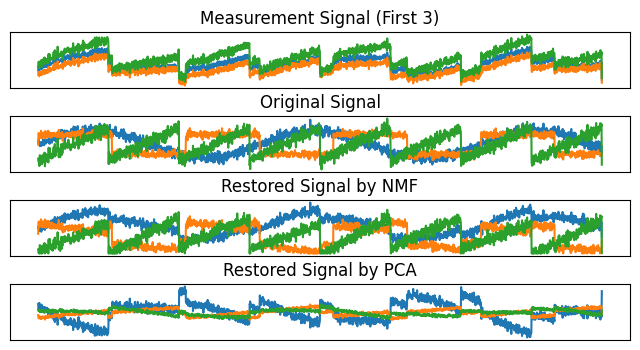

In [100]:
models = [X, S, S_, H]
names = ["Measurement Signal (First 3)", "Original Signal", "Restored Signal by NMF", "Restored Signal by PCA"]

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={"hspace": 0.5}, subplot_kw={"xticks": (), "yticks": ()})

for model, name, ax in zip(models, names, axes):
  ax.set_title(name)
  ax.plot(model[:, :3], "-");

- 참고를 위해 X에 담긴 측정 데이터 100개 중 처음 3개를 함께 그래프로 나타냈음
- 그래프에서 볼 수 있듯이 NMF는 원본 신호를 잘 복원했지만 PCA는 실패했고 데이터 변동의 대부분을 첫 번째 성분을 사용해 나타냈음
- NMF로 생성한 성분은 순서가 없음에 유념해야 함
- 이 예에서는 NMF 성분의 순서가 원본 신호와 같지만, 순전히 우연일 뿐 (세 커브의 겹쳐진 순서를 살펴봐야 함)
- PCA나 NMF처럼 데이터 포인트를 일정 개수의 성분을 사용해 가중치 합으로 분해할 수 있는 알고리즘이 많이 있음
- 성분과 계수에 있는 제약을 설명하려면 확률 이론이 필요할 때가 많음

## 4-3. t-SNE를 이용한 매니폴드 학습
- 데이터를 산점도로 시각화할 수 있다는 이점 때문에 PCA가 종종 데이터 변환에 가장 먼저 시도해볼 만한 방법
- 그러나 LFW 데이터셋의 산점도에서 본 것처럼 알고리즘의 (회전하고 방향을 제거하는) 태생상 유용성이 떨어짐
- 매니폴드 학습 (Manifold Learning) 알고리즘이라고 하는 시각화 알고리즘들은 훨씬 복잡한 매핑을 만들어 더 나은 시각화를 제공
- 특히 t-SNE 알고리즘을 아주 많이 사용
- 매니폴드 학습 알고리즘은 그 목적이 시각화라 3개 이상의 특성을 뽑는 경우는 거의 없음
- t-SNE를 포함해서 일부 매니폴드 알고리즘들은 훈련 데이터를 새로운 표현으로 변환시키지만 새로운 데이터에는 적용하지 못함
- 즉 테스트 세트에는 적용할 수 없고, 단지 훈련했던 데이터만 변환할 수 있음
- 그래서 매니폴드 학습은 탐색적 데이터 분석에 유용하지만 지도 학습용으로는 거의 사용하지 않음
- t-SNE의 아이디어는 데이터 포인트를 2차원에 무작위로 표현한 후 원본 특성 공간에서 가까운 포인트는 가깝게, 멀리 떨어진 포인트는 멀러지게 만듦
- t-SNE는 멀리 떨어진 포인트와 거리를 보존하는 것보다 가까이 있는 포인트에 더 많은 비중을 둠
- 다시 말해, 이웃 데이터 포인트에 대한 정보를 보존하려 노력

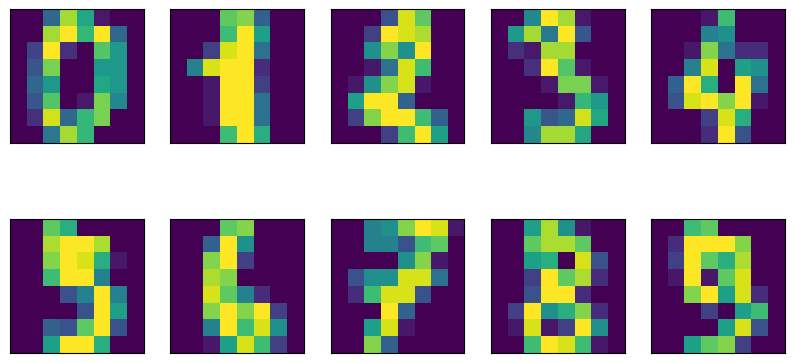

In [101]:
# scikit-learn에 있는 손글씨 숫자 데이터셋에 t-SNE 매니폴드 학습을 적용
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={"xticks": (), "yticks": ()})

for ax, img in zip(axes.ravel(), digits.images):
  ax.imshow(img)